<b>Feature Selection</b>

Simplest form of selection features: 
1. Remove features with very low varience
2. Remove features with very high correlation.

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import seaborn as sns

C:\Users\Kushagra\anaconda3\envs\deep_learning\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
data = fetch_california_housing()
X = data['data']
col_names = data['feature_names']
y = data['target']
df = pd.DataFrame(X,columns=col_names)
df.loc[:,"MedInc_Sqrt"] = df.MedInc.apply(np.sqrt)
df.corr()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


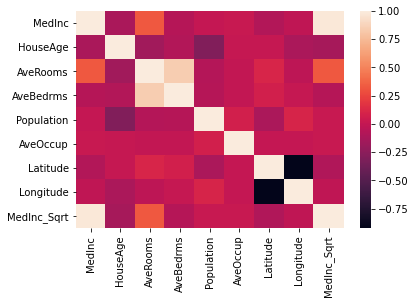

In [9]:
sns.heatmap(df.corr())

<b>Univariate Feature Selection</b> is nothing but a scoring of each feature against a given target.<br>
<b>Mutual information, ANOVA F-test, $chi^{2}$</b>

$chi^{2}$ - only for data which is non-negative in nature

Wrppaer for Univariate Feature Selection that can be for almost any new problem. 

In [10]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

C:\Users\Kushagra\anaconda3\envs\deep_learning\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Kushagra\anaconda3\envs\deep_learning\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [15]:
class UnvariateFeatureSelection:
    def __init__(self,n_features,problem_type,scoring):
        if problem_type  == 'classification':
            valid_scoring = {
            "f_classif": f_classif,
                "chi2": chi2,
                    "mutual_info_classif":mutual_info_classif
                        }
        else:
            valid_scoring = {
                "f_regression": f_regression,
                "mutual_info_regression":mutual_info_regression
            }
            
        if scoring not in valid_scoring:
            raise Exception("Invalid Scoring Function")
        if isinstance(n_features,int):
            self.selection = SlectKBest(
                valid_scoring[scoring],
                k = n_features
            )
        elif isinstance(n_features,float):
            self.selection = SelectPercentile(
            valid_scoring[scoring],
                percentile = int(n_features*100)
            )
        else:
            raise Expection("invlid Type of Features")
        
    def fit(self,X,y):
        return self.selection.fit(X,y)
    def transform(self,X):
        return self.selection.transform(X)
    def fit_transform(self,X,y):
        return self.selection.fit_transform(X,y)

In [16]:
ufs = UnvariateFeatureSelection(
    n_features = 0.1,
    problem_type="regression",
    scoring = "f_regression"
)
ufs.fit(X,y)
X_tranformed = ufs.transform(X)

Univariate feature selection may not always perform
well.<br>People prefer doing feature selection using a machine learning model.
Check out the other notebook.